# Data Cleaning/Cleansing/Wrangling

## Data cleaning will cover the following
1. Checking the columns and changing mispelled to correct names
2. checking missing values
3. checking for duplicates
4. checking for outliers

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading the dataset and getting information

In [4]:
#Reading the file
df = pd.read_csv("diabetes.csv")

In [5]:
#Checking top 5 columns
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [6]:
#checking the last 5 columns
df.tail()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y
1008,195,4543,f,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y


In [7]:
#checking the dataset shape
df.shape

(1009, 14)

In [8]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [9]:
#checking the info 2
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Columns: 14 entries, ID to CLASS
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [10]:
#concise summary statistics
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1009.000000,1.009000e+03,1008.000000,1008.000000,1007.000000,1006.000000,1007.000000,1007.000000,1008.000000,1007.000000,1008.000000,1009.000000
mean,339.161546,2.717448e+05,53.620040,5.131094,68.973188,8.284155,4.863873,2.348769,1.204216,2.610119,1.850595,29.589911
std,239.738169,3.365681e+06,8.740975,2.931136,59.813297,2.533576,1.297326,1.397487,0.658158,1.116095,3.649859,4.946246
min,1.000000,1.230000e+02,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,127.000000,2.406500e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,296.000000,3.439900e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,548.000000,4.539000e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [11]:
#Describe categorical features

df.describe(include='object')


,Gender,CLASS
count,1009,1009
unique,3,5
top,M,Y
freq,570,840


In [12]:
#Create a dataframe copy to be used in data cleaning
df1 = df.copy(deep = True)

In [13]:
# check for unique values in each column

for column in df1:
  unique_values = df1[column].unique()
  print(f"Unique values in column '{column}','\n': {unique_values}",'\n')


Unique values in column 'ID','
': [502 735 420 680 504 634 721 421 670 759 636 788  82 132 402 566 596 676
 729 742  64  97 126 390 458 470 494 564 696 106 138 315 650 678 699 703
 708 719 740 741 746 794 219 255 450 626 664 704 799 210 237 318 620 640
 668 701 174 276 345 482 630 789 348   7   9  10  42  47  71  72  83  88
  89  96  98  99 102 134 137 139 141 143 144 145 147 149 150 153 154 157
 161 165 166 171 180 181 182 186 190 197 435 472  85 710 429 702   4 189
 201 285 393 468 492 496 498 684 700 716 366 399 490 500 672 690 718 264
 464 466 686 688  16 705 709  19 123 476 682 706 754  68 342 712 715  12
  20  41  60  79  81 133 135 146 152 178  18  24 675  39 474 648  48 656
  57 658  69 662 714  87 231 505 654  61 127 228 674 744  58 108 198 357
 588 666 698 753 110 113 119 122 452 652 660 673 162 168 580 694 790 140
 375 426 453 534 612 692 717 725 777  67 109 351 552 685 750  31 129 173
 176 179 183 185 195 316 646 187 188 191 194 200 203 411 520 622 758 206
 600  76  86 209 

### 2. Data Cleaning


#### 2.1. Checking the colunms and dealing with mispelled columns

In [14]:
#check the colunms
df1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [15]:
#changing no_pation column
df1.rename(columns = {'No_Pation': 'Patient_No'}, inplace = True )

In [16]:
#Change columns name to lower case for unifromity
df1.columns = df1.columns.str.lower()

In [17]:
#Removing the white space if any
df1.columns = df1.columns.str.replace(' ', '')

In [18]:
#we can combine the 2 argument into one code
df1.columns = df1.columns.str.lower().str.replace(' ', '')

In [19]:
df1.columns

Index(['id', 'patient_no', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol',
       'tg', 'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')

In [20]:
#Drop unnessary columns
del df1['id'] # you can also used drop method: df.drop(columns = 'col_name', axis=1, inplace=True)

#droping specific row using index nummber
#df1.drop('id', axis=1, inplace = True)


### 2.2 Checking the missing values and dealing with them

In [21]:
#check the missing values
df1.isnull().sum()

patient_no    0
gender        0
age           1
urea          1
cr            2
hba1c         3
chol          2
tg            2
hdl           1
ldl           2
vldl          1
bmi           0
class         0
dtype: int64

In [22]:
#a. imputing "hba1c " variable using the mean

#Get the mean
mean_values = df1.hba1c.mean()

#fill up the missing value
df1['hba1c'].fillna(mean_values, inplace=True)

In [23]:
#b another way of doing the same thing as a bove
df1['hba1c'].fillna(df1['hba1c'].mean(), inplace=True)

In [24]:
#c Imputing using the median
df1['hba1c'].fillna(df1['hba1c'].median(), inplace=True)

In [25]:
#d. how to impute using the mode
gender_mode = df1.gender.mode()[0]
gender_mode

# impute with the mode
df1['gender'].fillna(gender_mode, inplace=True) # use bfill for backword fill, and ffill for forward fill

Observations:

The mode of a dataset can have multiple values. When we call `mode()` on a Pandas dataframe, it returns a Series object containing all the modal values. To access the first modal value, we use the `[0]` index.

For example, if the mode of the `gender` column in the `df1` dataframe is both `'Female'` and `'Male'`, then `df1.gender.mode()` will return a Series object containing both values. To access the first modal value, which is `'Female'`, we use `df1.gender.mode()[0]`.

Using `[0]` ensures that we are only using the first modal value for imputation, rather than all the modal values. This is important because using multiple values for imputation can introduce bias into the data.

In [26]:
#e. Fill missing values with specific values e.g 0
df1['hba1c'].fillna(0, inplace=True)

In [27]:
#f.Fill missing values in the categorical columns with specific values
df1['gender'].fillna('unknown', inplace=True)


In [28]:
#dropping the missing values# we drop when we just have few missing values
df1.dropna(inplace=True)

In [29]:
#check the null values
df1.isna().sum()

patient_no    0
gender        0
age           0
urea          0
cr            0
hba1c         0
chol          0
tg            0
hdl           0
ldl           0
vldl          0
bmi           0
class         0
dtype: int64

In [30]:
#Replacing values in the class column
df1.groupby('class')['class'].count()

class
N     102
N       1
P      53
Y     832
Y       9
Name: class, dtype: int64

In [31]:
df1['class'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [32]:
df1['class'] = df1['class'].str.replace('N ','N')
df1['class'] = df1['class'].str.replace('Y ','Y')
df1['class'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [33]:
#do the same for gender
df1.gender.unique()

array(['F', 'M', 'f'], dtype=object)

In [34]:
df1['gender'] = df1['gender'].str.replace('f','F')

### 2.3 Checking for duplicate


In [35]:
#check duplicates
df1.duplicated().sum()

3

In [36]:
#drop the duplicates
df1.drop_duplicates(inplace=True)

#check
df1.duplicated().sum()

0

### 2.4 Checking for outliers


<AxesSubplot:ylabel='cr'>

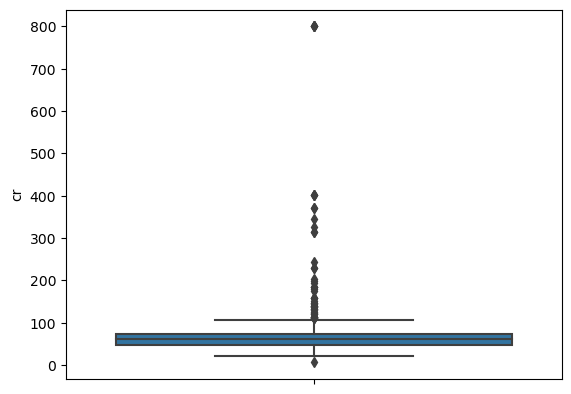

In [37]:


#checking for outlier
sns.boxplot(data=df1, y="cr")

In [38]:
#Remove the outlier using the maximum quantile

#a. Get the max interquantile
max_cr = df1['cr'].quantile(0.995)
max_cr

401.0

In [39]:
#check the outliers
df1[df1["cr"] > max_cr]

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
273,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [40]:
#Remove the outlier by assigning the value to a new DataFrame
df2 = df1[df1["cr"] < max_cr]

<AxesSubplot:ylabel='cr'>

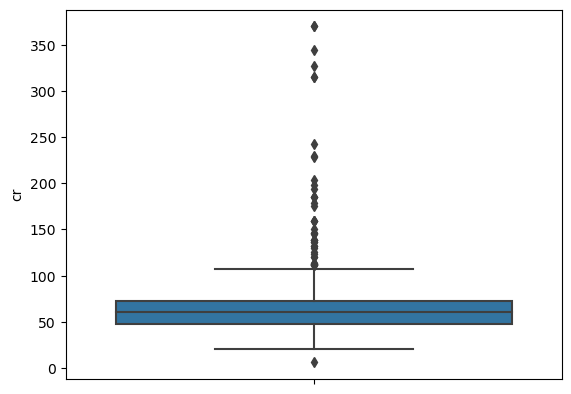

In [41]:
#confirm removal of outlier
sns.boxplot(y='cr', data=df2)

The outlier has been removed

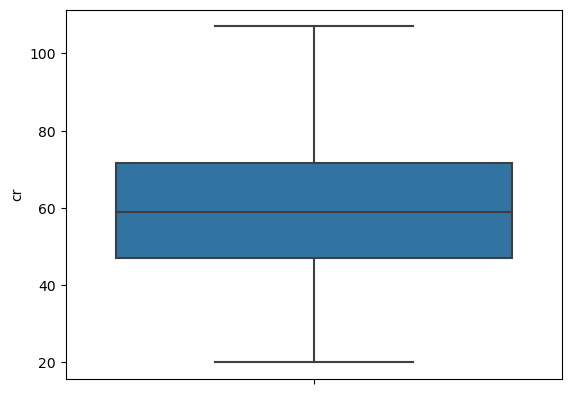

In [42]:
#b. similary we can use iqr to remove the outliers

# Calculate the interquartile range (IQR)
q1 = df1['cr'].quantile(0.25)
q3 = df1['cr'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the data to remove outliers
df2 = df1[(df1['cr'] >= lower_bound) & (df1['cr'] <= upper_bound)]

# Check the boxplot again
sns.boxplot(y='cr', data=df2);


### 2.5 Changing data types

In [ ]:
#Changing the data type, we use df['col name] = df['col_name].astype('int')# int for numerical column and category or object for categorical column
#data['gender'] = data['gender'].astype('category')

### 2.6 saving the clean dataset

In [43]:
#save the new dataframe in svs format
df2.to_csv('clean_diabetis.csv', index=False)

# Exploratory Data Analysis

EDA stands for Exploratory Data Analysis. It's a crucial initial step in data science projects where you analyze and investigate data sets to summarize their main characteristics.

Key goals of EDA include:

Understanding the data: Getting a sense of the data's distribution, range, and central tendencies.
Identifying patterns: Discovering trends, correlations, or anomalies within the data.
Checking assumptions: Verifying assumptions made about the data before further analysis or modeling.
Generating hypotheses: Developing potential explanations or questions based on the findings.
Common techniques used in EDA:

Visualization: Creating plots, charts, and graphs to visually represent the data and make patterns easier to spot.
Summary statistics: Calculating measures like mean, median, mode, standard deviation, and quartiles to summarize the data numerically.
Data cleaning: Identifying and handling missing values, outliers, or inconsistencies in the data.
Feature engineering: Creating new features or transforming existing ones to improve the data's quality or relevance for analysis.

Benefits of EDA:

* Improved understanding: It helps you gain a deeper understanding of the data and its underlying structure.
* Better decision-making: It provides insights that can inform your data analysis and modeling choices.
* Enhanced model performance: A well-conducted EDA can lead to more accurate and reliable models.
* Hypothesis generation: It can spark new ideas and research directions.

By effectively exploring and understanding your data through EDA, you can lay a strong foundation for further analysis and draw meaningful conclusions.

In [44]:
#load the clean Dataset and create a adataframe
data = pd.read_csv('clean_diabetis.csv')
data.head()

,patient_no,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [45]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Univariate analysis

Univariate analysis is a statistical technique used to describe and summarize the distribution of a single variable. It is often used as a preliminary step in data analysis to identify patterns, trends, and outliers.

There are a number of different univariate analysis techniques, including:

* **Frequency distribution(count plot):** This shows the number of times each unique value occurs in a variable.
* **Histogram:** This is a graphical representation of the frequency distribution.
* **Boxplot:** This shows the median, quartiles, and outliers of a variable.
* **Stem-and-leaf plot:** This is a graphical representation of the data that shows the individual values and their distribution.

Univariate analysis can be used to answer a variety of questions about a variable, such as:

* What is the most common value?
* What is the average value?
* What is the range of values?
* Are there any outliers?
* Is the distribution skewed?

Univariate analysis can be performed using a variety of statistical software packages, such as R, Python, and SAS.

Here is an example of how to perform univariate analysis on a variable in Python:

a. Count Plot

A count plot is a type of bar chart that shows the number of times each unique value occurs in a variable. It is often used to visualize the distribution of categorical variables.

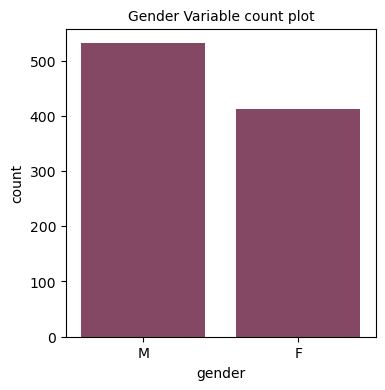

In [46]:
#i. which gender has the highest records
gender_count = data['gender'].value_counts().index

#count plot for number of patient variable sns.
plt.figure(figsize=(4,4))
sns.countplot(x=data['gender'], order=gender_count, color='#8E3E63')
plt.title('Gender Variable count plot', fontsize=10)
plt.show()


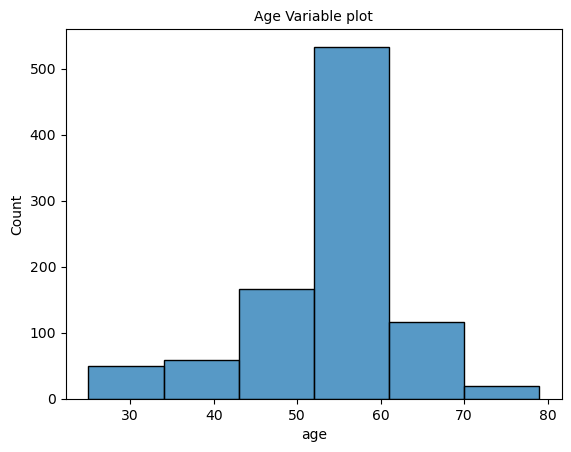

In [48]:
#hist plot for age variable.
sns.histplot(x=data['age'], bins=6)
plt.title('Age Variable plot', fontsize=10)
plt.show()

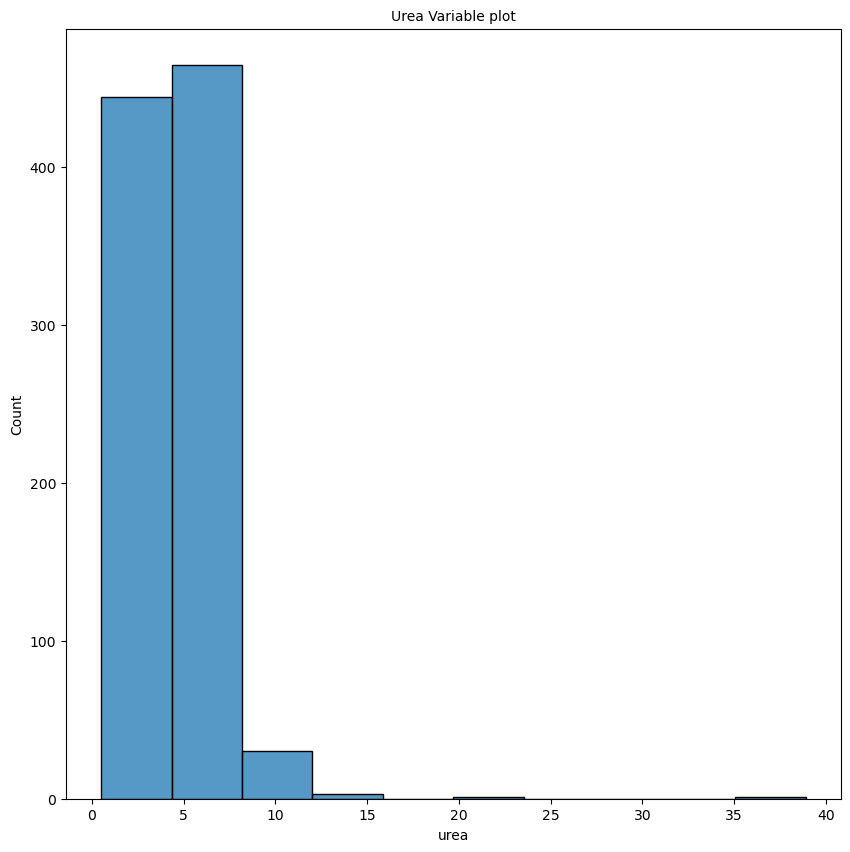

In [49]:
plt.figure(figsize=(10,10))
sns.histplot(x=data['urea'], bins=10)
plt.title('Urea Variable plot', fontsize=10)
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

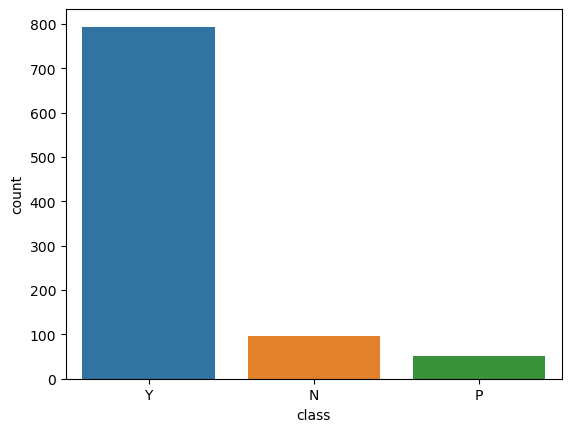

In [50]:
class_value= data['class'].value_counts().index

sns.countplot(x=data['class'], order=class_value)

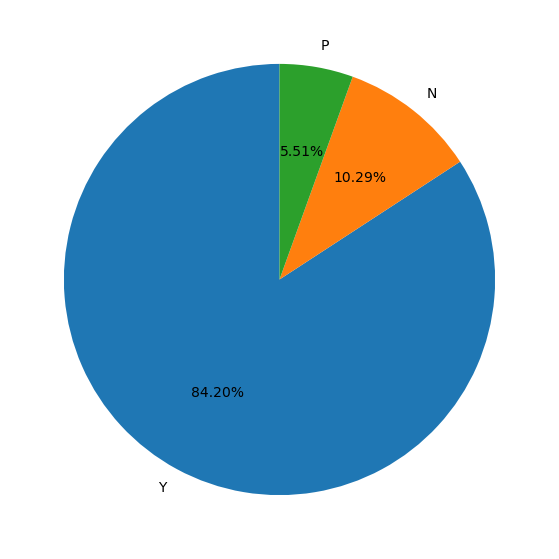

In [53]:
# ii which is the highest between those with and those without diabetis

diabetis_count = data['class'].value_counts()

#create a pie chart to visualize class column
# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(diabetis_count, labels=diabetis_count.index, autopct='%0.2f%%', startangle=90, explode=[0.0,0.0,0.0])
plt.show()


In [54]:
# Measures of Central tendancy Yearly earnings

columns = [['age', 'urea', 'cr', 'hba1c', 'chol', 'tg',
       'hdl', 'ldl', 'vldl', 'bmi']]

for column in columns:
  print("\n\n")
  print("mean is: \n"+ str(round(data[column].mean(), 2)))
  print("\n\n")
  print("median is:\n "+ str(data[column].median()))
  print("\n\n")
  print("mode is:\n " + str(data[column].mode()))
  print("\n\n")
  print("skew is:\n " + str(data[column].skew()))
  print("\n\n")
  print("kurtosis is:\n " + str(data[column].kurtosis()))






mean is: 
age      53.52
urea      4.72
cr       59.67
hba1c     8.29
chol      4.87
tg        2.33
hdl       1.21
ldl       2.61
vldl      1.89
bmi      29.55
dtype: float64



median is:
 age      55.0
urea      4.5
cr       59.0
hba1c     8.0
chol      4.8
tg        2.0
hdl       1.1
ldl       2.5
vldl      0.9
bmi      30.0
dtype: float64



mode is:
     age  urea    cr  hba1c  chol   tg  hdl  ldl  vldl   bmi
0  55.0   4.3  56.0    8.0   4.4  2.1  1.1  2.5   0.9  30.0



skew is:
 age     -0.815867
urea     5.856407
cr       0.295107
hba1c    0.217552
chol     0.643264
tg       2.350019
hdl      6.337827
ldl      1.176540
vldl     5.205847
bmi      0.159203
dtype: float64



kurtosis is:
 age       1.396943
urea     83.827564
cr       -0.233516
hba1c    -0.286633
chol      1.894688
tg       10.985371
hdl      62.349821
ldl       4.320989
vldl     31.593391
bmi      -0.254399
dtype: float64


#### What is kurtosis

Kurtosis is a statistical measure that describes the shape of a distribution. It is defined as the fourth moment of the distribution divided by the square of the variance.

A distribution with a positive kurtosis is said to be leptokurtic, meaning that it has a higher peak and thicker tails than a normal distribution. A distribution with a negative kurtosis is said to be platykurtic, meaning that it has a lower peak and thinner tails than a normal distribution.

In [ ]:
#checking for kurtosis of bmi, vldl etc.

In [55]:
#check
data['age'].kurtosis()

1.396942819499329

#What is skewness

Skewness is a measure of the asymmetry of a distribution. It is defined as the third moment of the distribution divided by the third power of the standard deviation.

A distribution with a positive skewness is said to be skewed to the right, meaning that the tail on the right side of the distribution is longer than the tail on the left side. A distribution with a negative skewness is said to be skewed to the left, meaning that the tail on the left side of the distribution is longer than the tail on the right side.

A distribution with a skewness of zero is said to be symmetric.

In [56]:
data['age'].skew()

-0.8158667725750883

## 2. Bivariate Analysis

Bivariate analysis is a statistical technique used to describe and summarize the relationship between two variables. It is often used as a preliminary step in data analysis to identify patterns, trends, and correlations.

There are a number of different bivariate analysis techniques, including:

* **Scatter plot:** This is a graphical representation of the relationship between two variables.
* **Correlation coefficient:** This is a numerical measure of the strength and direction of the relationship between two variables.
* **Regression analysis:** This is a statistical technique used to predict the value of one variable based on the value of another variable.

Bivariate analysis can be used to answer a variety of questions about the relationship between two variables, such as:

* Is there a relationship between the two variables?
* What is the strength and direction of the relationship?
* Can one variable be used to predict the other variable?


a Bar plot

Bar plots are used to compare the values of different categories. They are often used to visualize the distribution of categorical variables, or to compare the means of different groups.

Here are some examples of when you might use a bar plot:

* To compare the number of patients in each gender category.
* To compare the mean blood pressure of patients with and without diabetes.
* To compare the mean age of patients in different age groups.

Bar plots are a simple and effective way to visualize categorical data. They are easy to create and interpret, and they can be used to communicate complex information quickly and clearly.


<AxesSubplot:xlabel='gender'>

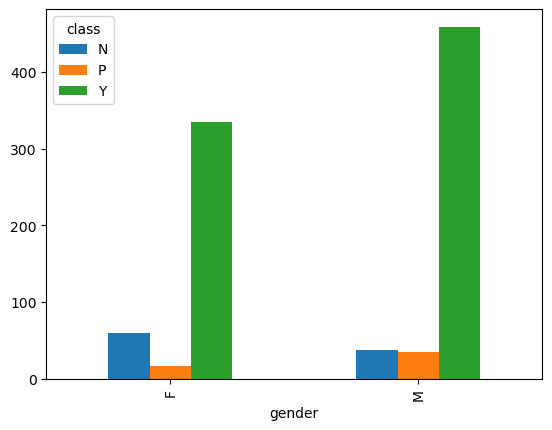

In [57]:
#Create a crosstab
gender_class = pd.crosstab(data['gender'], data['class'])
gender_class
#visualize barchart
gender_class.plot(kind='bar')

<AxesSubplot:ylabel='age'>

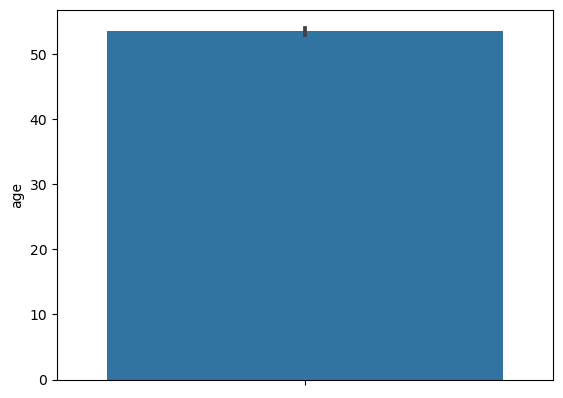

In [58]:
sns.barplot(y=data['age'], hue = data['class'])

<AxesSubplot:xlabel='age', ylabel='cr'>

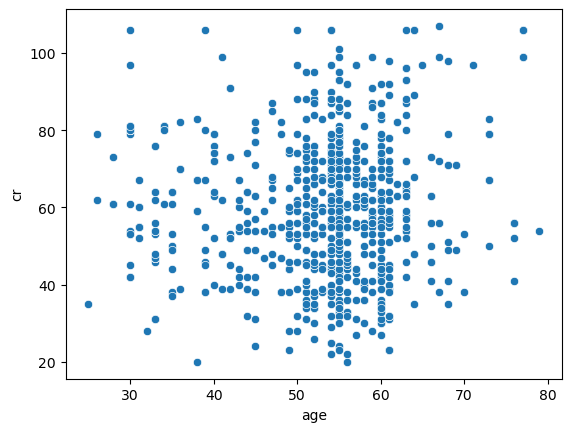

In [59]:
sns.scatterplot(x=data['age'], y=data['cr'])

<AxesSubplot:xlabel='urea', ylabel='cr'>

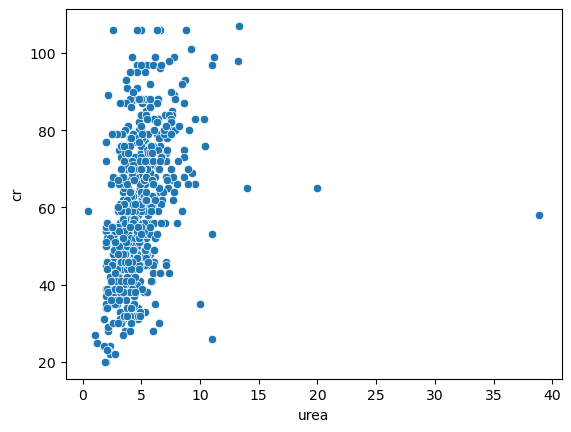

In [60]:
sns.scatterplot(x=data['urea'], y=data['cr'])

<AxesSubplot:xlabel='age', ylabel='ldl'>

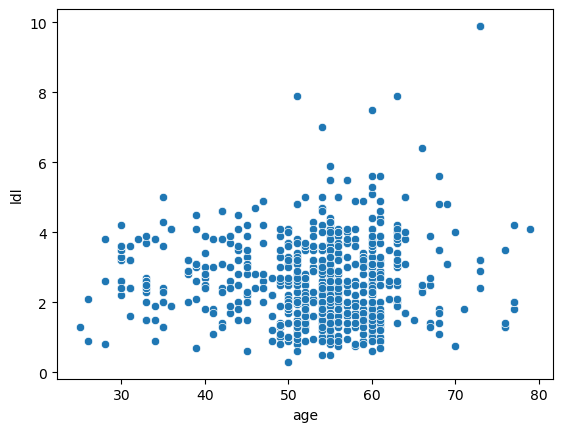

In [61]:
sns.scatterplot(y=data['ldl'], x=data['age'])

In [62]:
#subset the numerical columns
data_int = data[['age', 'urea', 'cr', 'hba1c', 'chol', 'tg',
       'hdl', 'ldl', 'vldl', 'bmi']]

In [63]:
corr = data_int.corr()
corr


,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi
age,1.000000,0.112535,0.057701,0.389694,0.041051,0.147962,-0.010707,0.017925,-0.093850,0.362767
urea,0.112535,1.000000,0.393803,-0.019531,0.022277,0.017585,-0.012110,-0.003245,0.017571,0.035876
cr,0.057701,0.393803,1.000000,-0.129846,-0.015472,0.020221,-0.032179,0.077339,0.121511,-0.010077
hba1c,0.389694,-0.019531,-0.129846,1.000000,0.167145,0.227173,0.031406,0.013435,0.070727,0.414556
chol,0.041051,0.022277,-0.015472,0.167145,1.000000,0.327974,0.100977,0.425746,0.071136,0.016667
tg,0.147962,0.017585,0.020221,0.227173,0.327974,1.000000,-0.089881,0.003489,0.149557,0.101813
hdl,-0.010707,-0.012110,-0.032179,0.031406,0.100977,-0.089881,1.000000,-0.147299,-0.061343,0.076908
ldl,0.017925,-0.003245,0.077339,0.013435,0.425746,0.003489,-0.147299,1.000000,0.064942,-0.060456
vldl,-0.093850,0.017571,0.121511,0.070727,0.071136,0.149557,-0.061343,0.064942,1.000000,0.204392
bmi,0.362767,0.035876,-0.010077,0.414556,0.016667,0.101813,0.076908,-0.060456,0.204392,1.000000


<AxesSubplot:>

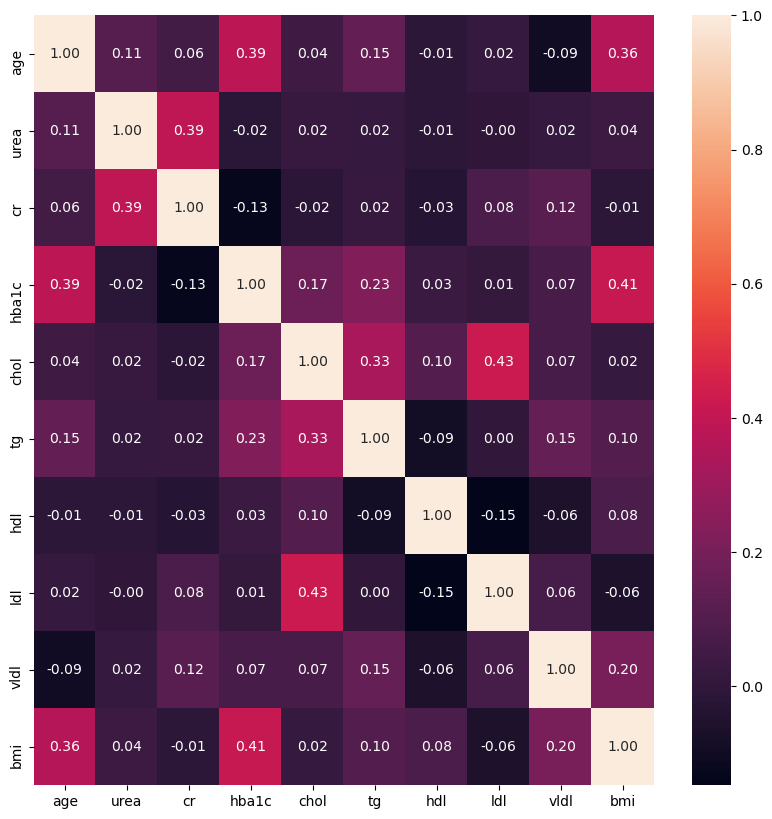

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f')

## 3. Multivariate Analayis

Multivariate analysis is a statistical technique used to describe and summarize the relationship between three or more variables. It is often used as a preliminary step in data analysis to identify patterns, trends, and correlations.

There are a number of different multivariate analysis techniques, including:

* **Multiple regression analysis:** This is a statistical technique used to predict the value of one variable based on the values of two or more other variables.
* **Factor analysis:** This is a statistical technique used to reduce the number of variables in a dataset by identifying groups of variables that are correlated.
* **Cluster analysis:** This is a statistical technique used to group observations into clusters based on their similarity.
* **Discriminant analysis:** This is a statistical technique used to classify observations into two or more groups based on their characteristics.

Multivariate analysis can be used to answer a variety of questions about the relationship between three or more variables, such as:

* What are the most important factors that influence a particular outcome?
* How can we group observations into clusters based on their similarity?
* How can we classify observations into two or more groups based on their characteristics?

Multivariate analysis is a powerful tool that can be used to gain insights into the relationships between multiple variables. It is often used in a variety of fields, such as marketing, finance, and healthcare.

<AxesSubplot:xlabel='urea', ylabel='cr'>

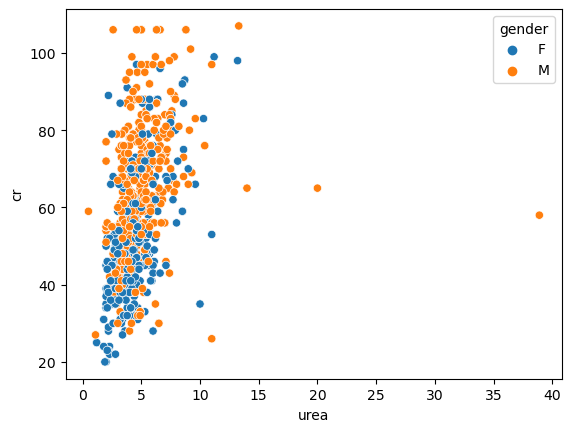

In [65]:
sns.scatterplot(x=data['urea'], y=data['cr'], hue=data['gender'])

<AxesSubplot:xlabel='urea', ylabel='cr'>

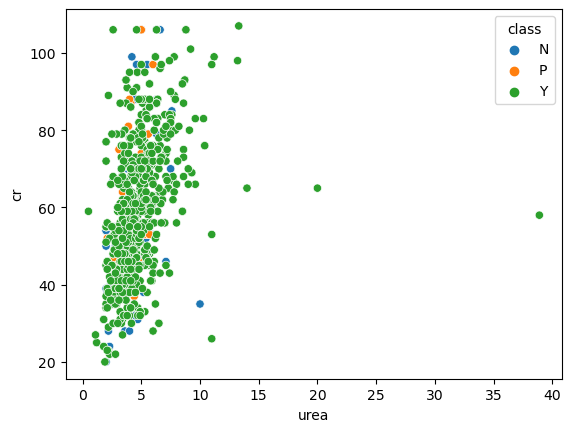

In [66]:
sns.scatterplot(x=data['urea'], y=data['cr'], hue=data['class'])